## Automatic Urban Resilience Metrics Identification

- **Appraoch** - 
Leverage the latest in Natural Language Processing (NLP) capabilities to automatically harvest, extract, categorize, and visualize Urban Resilience Metrics as defined by major worldwide cities.

- **Harvest** – Gather unstructured websites and openly available city urban resilience reports and content, and in particular how the cities define urban resilience metrics and how they plan on capturing data to populate these urban resilience metrics
- **Extract** – Leverage NLP capabilities to automatically extract definitions and categorizations of urban resilience metrics from these unstructured reports and websites.
- **Categorize** – Organize the resultant extracted content into common themes across all of the cities

Rockefeller Foundation conducted resilience research on 100 different cities. Cumulated in the 100RC_DataCollection.csv is a list of the reports released, manually gathered information. Using the NLP, using various NLP techniques, we'll look into what we can call as a universal metric.


In [1]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('100RC_DataCollection.xlsx')

# Display the first few rows of the DataFrame
df.head()

,Region,Country,City,Source,Other links,No source
0,Asia Pacific,India,Surat,https://resilientcitiesnetwork.org/downloadabl...,NaN,NaN
1,Asia Pacific,India,Pune,https://resilientcitiesnetwork.org/downloadabl...,NaN,NaN
2,Asia Pacific,India,Chennai,https://resilientcitiesnetwork.org/downloadabl...,https://resilientchennai.com/,NaN
3,Asia Pacific,China,Deyang,https://resilientcitiesnetwork.org/downloadabl...,NaN,NaN
4,Asia Pacific,China,Huangshi,https://resilientcitiesnetwork.org/downloadabl...,NaN,NaN


In [2]:
!pip install -q PyPDF2

In [3]:
!pip install -q requests

In [107]:
import requests
from PyPDF2 import PdfReader

def download_and_extract_text(url, output_pdf_file):
    # Download the file
    response = requests.get(url)
    with open(output_pdf_file, 'wb') as f:
        f.write(response.content)

    # Extract text from the downloaded PDF
    with open(output_pdf_file, 'rb') as f:
        reader = PdfReader(f)
        text = ''
        for page in reader.pages:
            text += page.extract_text()

    return text


In [ ]:
url = 'https://resilientcitiesnetwork.org/downloadable_resources/Network/Surat-Resilience-Strategy-English.pdf'
output_pdf_file = 'Surat-Resilience-Strategy-English.pdf'

Surat_text = download_and_extract_text(url, output_pdf_file)
print(Surat_text)


In [109]:
# import requests

# # The URL of the file to be downloaded
# url = 'https://resilientcitiesnetwork.org/downloadable_resources/Network/Surat-Resilience-Strategy-English.pdf'

# # Send a GET request to the URL
# response = requests.get(url)

# # Write the content of the response to a file
# with open('Surat-Resilience-Strategy-English.pdf', 'wb') as file:
#     file.write(response.content)

In [108]:
# from PyPDF2 import PdfReader

# # Open the PDF file
# with open('Surat-Resilience-Strategy-English.pdf', 'rb') as file:
#     # Create a PDF file reader object
#     reader = PdfReader(file)

#     # Initialize an empty string to hold the extracted text
#     text = ''

#     # Loop through all the pages in the PDF file and extract the text
#     for page in reader.pages:
#         text += page.extract_text()

# # Now 'text' contains the extracted text from the PDF file
# text

# print(text)

In [6]:
!pip install -q nltk spacy textblob gensim matplotlib seaborn wordcloud geopandas #library package

ERROR: Invalid requirement: '#library'


#### NLTK model - Preprocessing

In [110]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize a WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a list of stopwords to be removed from the text
stop_words = set(stopwords.words('english'))

# Tokenize the text into sentences
sentences = sent_tokenize(Surat_text)

# Initialize an empty list to hold the preprocessed sentences
preprocessed_sentences = []

# Loop through each sentence
for sentence in sentences:
    # Remove punctuation and convert to lowercase
    sentence = sentence.translate(str.maketrans('', '', string.punctuation)).lower()

    # Tokenize the sentence into words
    words = word_tokenize(sentence)

    # Remove stopwords and lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Add the preprocessed sentence to the list
    preprocessed_sentences.append(' '.join(words))

# Now 'preprocessed_sentences' contains the preprocessed text
preprocessed_sentences

print(preprocessed_sentences)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['photograph credit tejas ghariwala suratsurat resilience strategysteered supported strategic partner taru leading edge pvt', 'ltd india special credit m aparna ia former municipal commissioner smcmr', 'manoj kumar da ia former municipal commissioner smc managed surat climate change trust scctmr thennarasan ia commissioner smc chairman scctmr', 'jatin shah advisor smc managing trustee scctmr', 'jivan patel dy', 'commissioner smc trustee scctmr', 'chaitanya bhatt dy', 'commissioner smc trustee scctmr', 'r mahakal superintendent engineer nwrws trustee scctmr', '', 'b patel director gsdma trustee scctmr', 'b agrawal president sgcci trustee scctmr', 'p shah vicepresident sgcci trustee scctdr', 'r gandhi director svnit trustee scctmr', 'kanti bhanderi councillor smc trustee scctms', 'vaishali shah councillor smc trustee scctdr', 'vikas desai trustee scctmr', 'kamlesh yagnik trustee scctdr', 'akash acharya nominee centre social study team composition jatin shah adviser smc managing trustee s

In [ ]:
!python -m spacy download en_core_web_sm

### Spacy resilience metric

In [113]:
import spacy
from spacy.matcher import Matcher

# Load the Spacy model
nlp = spacy.load('en_core_web_sm')

# Initialize a Spacy Matcher
matcher = Matcher(nlp.vocab)

# Define patterns for the resilience metrics
patterns = [
    [{'LOWER': 'healthcare'}, {'LOWER': 'facilities'}],
    [{'LOWER': 'clean'}, {'LOWER': 'water'}],
    [{'LOWER': 'nutritious'}, {'LOWER': 'food'}],
    [{'LOWER': 'employment'}, {'LOWER': 'opportunities'}],
    [{'LOWER': 'income'}, {'LOWER': 'equality'}],
    [{'LOWER': 'public'}, {'LOWER': 'health'}, {'LOWER': 'policies'}],
    [{'LOWER': 'crime'}],
    [{'LOWER': 'economic'}, {'LOWER': 'diversity'}],
    [{'LOWER': 'local'}, {'LOWER': 'economy'}],
    [{'LOWER': 'law'}, {'LOWER': 'enforcement'}],
    [{'LOWER': 'social'}, {'LOWER': 'cohesion'}],
    [{'LOWER': 'social'}, {'LOWER': 'inequality'}],
    [{'LOWER': 'dispute'}, {'LOWER': 'resolution'}],
    [{'LOWER': 'transportation'}, {'LOWER': 'infrastructure'}],
    [{'LOWER': 'internet'}, {'LOWER': 'access'}],
    [{'LOWER': 'utilities'}],
    [{'LOWER': 'waste'}, {'LOWER': 'management'}],
    [{'LOWER': 'natural'}, {'LOWER': 'resources'}],
    [{'LOWER': 'environmental'}, {'LOWER': 'regulations'}],
    [{'LOWER': 'government'}, {'LOWER': 'leadership'}],
    [{'LOWER': 'corruption'}],
    [{'LOWER': 'public'}, {'LOWER': 'participation'}],
    [{'LOWER': 'education'}, {'LOWER': 'and'}, {'LOWER': 'training'}],
    [{'LOWER': 'urban'}, {'LOWER': 'planning'}],
    [{'LOWER': 'integration'}],
    [{'LOWER': 'connectivity'}, {'LOWER': 'mobility'}],
    [{'LOWER': 'affordable'}, {'LOWER': 'housing'}],
    [{'LOWER': 'economy'}],
    [{'LOWER': 'environment'}, {'LOWER': 'ecosystem'}],
    [{'LOWER': 'social'}, {'LOWER': 'cohesion'}],
    [{'LOWER': 'public'}, {'LOWER': 'health'}],
    [{'LOWER': 'water'}, {'LOWER': 'quality'}],
    [{'LOWER': 'water'}, {'LOWER': 'quantity'}],
    [{'LOWER': 'pollution'}]
]

# Add the patterns to the matcher
matcher.add('RESILIENCE_METRICS', patterns)

# Initialize an empty list to hold the matched resilience metrics
resilience_metrics = []

# Loop through each preprocessed sentence
for sentence in preprocessed_sentences:
    # Convert the sentence to a Spacy Doc
    doc = nlp(sentence)

    # Find matches in the doc
    matches = matcher(doc)

    # Loop through each match
    for match_id, start, end in matches:
        # Get the matched span
        span = doc[start:end]

        # Add the matched resilience metric to the list
        resilience_metrics.append(span.text)

resilience_metrics




['pollution',
 'pollution',
 'public health',
 'social cohesion',
 'waste management',
 'connectivity mobility',
 'affordable housing',
 'affordable housing',
 'water quality',
 'pollution',
 'water quality',
 'economy',
 'economy',
 'environment ecosystem',
 'pollution',
 'pollution',
 'social cohesion',
 'social cohesion',
 'public health',
 'pollution',
 'public health',
 'affordable housing',
 'pollution',
 'crime',
 'public health',
 'public health',
 'pollution',
 'law enforcement',
 'integration',
 'connectivity mobility',
 'connectivity mobility',
 'environment ecosystem',
 'public health',
 'social cohesion',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'social cohesion',
 'affordable housing',
 'economy',
 'economy',
 'environment ecosystem',
 'economy',
 'public health',
 'affordable housing',
 'public health',
 'social cohesion',
 'public participation',
 'environment ecosystem',
 'connectivity mobility',
 'environment ecosystem',
 'public health',


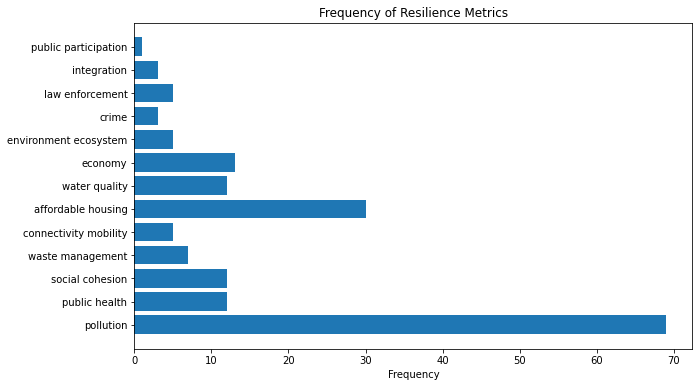

In [38]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the frequency of each resilience metric
frequency_resilience = Counter(resilience_metrics)

# Create a bar plot of the frequencies
plt.figure(figsize=(10, 6))
plt.barh(list(frequency_resilience.keys()), list(frequency_resilience.values()))
plt.xlabel('Frequency')
plt.title('Frequency of Resilience Metrics')
plt.show()

In [11]:
!pip install torch
!pip install transformers

In [114]:
from transformers import pipeline
import pandas as pd
import nltk
nltk.download('punkt')

# Create a sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model='distilbert-base-uncased-finetuned-sst-2-english')

# Tokenize the Surat text into sentences
surat_sentences = nltk.tokenize.sent_tokenize(Surat_text.lower())

# Define resilience metrics
resilience_metrics = ['public participation', 'integration', 'law enforcement', 'crime', 'environment ecosystem', 'economy', 'water quality', 'affordable housing', 'connectivity mobility', 'waste management', 'social cohesion', 'public health', 'pollution']

# Convert resilience metrics to lower case
resilience_metrics = [metric.lower() for metric in resilience_metrics]

# Initialize an empty list to hold the results
results = []

# Analyze the sentiment of each sentence containing a resilience metric
for sentence in surat_sentences:
    if any(metric in nltk.tokenize.word_tokenize(sentence) for metric in resilience_metrics):
        # Split long sentences into chunks of 512 tokens
        sentence_chunks = [sentence[i:i+512] for i in range(0, len(sentence), 512)]
        for chunk in sentence_chunks:
            result = sentiment_analyzer(chunk)
            results.append([chunk, result[0]['label'], result[0]['score']])

# Convert the results list to a DataFrame
df = pd.DataFrame(results, columns=['Sentence', 'Sentiment', 'Score'])

# Print the DataFrame
print(df)

df.to_csv('sentiment_analysis_results.csv', index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             Sentence Sentiment     Score
0   the city invites all allies to act for, and co...  POSITIVE  0.998330
1   nd orientation\nsurat resilience pillars, goal...  NEGATIVE  0.929081
2   of real estate developers’ associations of ind...  NEGATIVE  0.958493
3   ion system\ngmfb gujarat municipal finance boa...  NEGATIVE  0.983544
4   inistry of health and family welfare\nmoud min...  NEGATIVE  0.968988
..                                                ...       ...       ...
86  brief\ngreen cover in the city leads to cleane...  NEGATIVE  0.996489
87  this further increases the stress on the city’...  POSITIVE  0.991987
88  surat is said to have lost its unique culture,...  NEGATIVE  0.999743
89  ‘city resilience strategy’ central pollution c...  NEGATIVE  0.514001
90  http:/ /censusindia.gov.in/\ngujarat pollution...  NEGATIVE  0.976134

[91 rows x 3 columns]


In [115]:
# Create a sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model='distilbert-base-uncased-finetuned-sst-2-english')

# Tokenize the Surat text into words
surat_words = nltk.tokenize.word_tokenize(Surat_text.lower())

# Define resilience metrics
resilience_metrics = ['public participation', 'integration', 'law enforcement', 'crime', 'environment ecosystem', 'economy', 'water quality', 'affordable housing', 'connectivity mobility', 'waste management', 'social cohesion', 'public health', 'pollution']

# Convert resilience metrics to lower case
resilience_metrics = [metric.lower() for metric in resilience_metrics]

# Initialize an empty list to hold the results
results = []

# Analyze the sentiment of each word that is a resilience metric
for word in surat_words:
    if word in resilience_metrics:
        result = sentiment_analyzer(word)
        results.append([word, result[0]['label'], result[0]['score']])

# Convert the results list to a DataFrame
df = pd.DataFrame(results, columns=['Word', 'Sentiment', 'Score'])

df = df.drop_duplicates()

# Print the DataFrame
print(df)


           Word Sentiment     Score
0     pollution  NEGATIVE  0.999501
3       economy  POSITIVE  0.998665
9         crime  NEGATIVE  0.993622
11  integration  POSITIVE  0.999180


#### LDA Model - Topic modeling top 10

In [116]:

from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
import numpy as np
np.random.seed(153)

def lemmatize(Surat_text):
    return WordNetLemmatizer().lemmatize(Surat_text, pos='v')

def preprocess(Surat_text):
    result = []
    for token in simple_preprocess(Surat_text):
        if token not in STOPWORDS and len(token) > 3:
            result.append(lemmatize(token))
    return result

# Preprocess the text
processed_docs = [preprocess(doc) for doc in preprocessed_sentences]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(processed_docs)

# Filter out words that occur less than 10 documents, or more than 50% of the documents
dictionary.filter_extremes(no_below=10, no_above=0.5)

# Create Bag-of-words representation of the documents
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=5)

# Print the Keyword in the 10 topics
lda_model.print_topics()


[(0,
  '0.049*"city" + 0.030*"percent" + 0.025*"water" + 0.023*"issue" + 0.022*"challenge" + 0.020*"support" + 0.020*"sector" + 0.018*"initiative" + 0.016*"vehicle" + 0.016*"economy"'),
 (1,
  '0.092*"water" + 0.054*"supply" + 0.043*"surat" + 0.042*"technology" + 0.039*"engineer" + 0.024*"department" + 0.022*"city" + 0.017*"tapi" + 0.017*"institute" + 0.015*"opportunity"'),
 (2,
  '0.075*"surat" + 0.063*"water" + 0.044*"corporation" + 0.042*"municipal" + 0.036*"city" + 0.024*"department" + 0.021*"strategy" + 0.019*"development" + 0.019*"cell" + 0.017*"pollution"'),
 (3,
  '0.086*"city" + 0.028*"industrial" + 0.026*"surat" + 0.025*"water" + 0.023*"area" + 0.021*"increase" + 0.020*"monitor" + 0.020*"pollution" + 0.019*"policy" + 0.019*"flood"'),
 (4,
  '0.083*"city" + 0.072*"surat" + 0.040*"traffic" + 0.029*"road" + 0.020*"transport" + 0.019*"state" + 0.019*"policy" + 0.018*"initiative" + 0.016*"smart" + 0.016*"public"'),
 (5,
  '0.097*"resilience" + 0.065*"health" + 0.047*"surat" + 0.04

In [95]:
from gensim.models import Word2Vec

# Train a Word2Vec model
model = Word2Vec(processed_docs, min_count=1)

# Vector for challenge
resilience_vector = model.wv['pollution']

# Similar word for challenge
similar_words = model.wv.most_similar('pollution', topn=20)

similar_words

[('water', 0.9981004595756531),
 ('city', 0.9979302287101746),
 ('house', 0.9979143738746643),
 ('policy', 0.9977485537528992),
 ('strategy', 0.9977234601974487),
 ('area', 0.9977015852928162),
 ('initiative', 0.9976964592933655),
 ('development', 0.9976584911346436),
 ('surat', 0.9976113438606262),
 ('project', 0.9974467754364014),
 ('technology', 0.9974449276924133),
 ('gujarat', 0.997386634349823),
 ('urban', 0.9972599744796753),
 ('monitor', 0.9972387552261353),
 ('supply', 0.9972198009490967),
 ('resilience', 0.9971844553947449),
 ('develop', 0.9971779584884644),
 ('transport', 0.9971605539321899),
 ('traffic', 0.9971467852592468),
 ('awareness', 0.9971388578414917)]

In [117]:
def preprocess_modified(Surat_text):
    result = []
    for token in simple_preprocess(Surat_text):
        if token not in STOPWORDS:
            result.append(lemmatize(token))
    return result

# Preprocess the text with modified preprocessing function
processed_docs_modified = [preprocess_modified(doc) for doc in preprocessed_sentences]

# Train a Word2Vec model with modified preprocessing
model_modified = Word2Vec(processed_docs_modified, min_count=1)

# Try to get the vector for 'resilience'
try:
    resilience_vector_modified = model_modified.wv['pollution']
    similar_words_modified = model_modified.wv.most_similar('pollution', topn=20)
except KeyError:
    similar_words_modified = 'The word resilience is still not in the vocabulary.'

similar_words_modified


[('mr', 0.9985212683677673),
 ('surat', 0.9983361959457397),
 ('water', 0.9982829689979553),
 ('develop', 0.9980910420417786),
 ('city', 0.9980683326721191),
 ('road', 0.9979090690612793),
 ('quality', 0.9978646636009216),
 ('increase', 0.9978590607643127),
 ('area', 0.9978481531143188),
 ('supply', 0.9978038668632507),
 ('urban', 0.9977394938468933),
 ('river', 0.9977121949195862),
 ('resilience', 0.9977015256881714),
 ('initiative', 0.9976963996887207),
 ('support', 0.9976727962493896),
 ('policy', 0.9976704716682434),
 ('build', 0.9976574778556824),
 ('affordable', 0.9976359605789185),
 ('house', 0.9976300597190857),
 ('research', 0.9976227879524231)]

In [16]:
import gensim.downloader as api


In [97]:
# Download the 'glove-wiki-gigaword-300' model
glove_model = api.load('glove-wiki-gigaword-300')

try:
    resilience_vector_glove = glove_model['pollution']
    similar_words_glove = glove_model.most_similar('pollution', topn=10)
except KeyError:
    similar_words_glove = 'The word resilience is still not in the vocabulary.'

similar_words_glove

[('emissions', 0.6847870945930481),
 ('pollutants', 0.6770709753036499),
 ('environmental', 0.6384705901145935),
 ('smog', 0.6194671988487244),
 ('polluted', 0.6174101233482361),
 ('dioxide', 0.597844123840332),
 ('pollutant', 0.5828356146812439),
 ('carbon', 0.5641278624534607),
 ('greenhouse', 0.5608704686164856),
 ('emission', 0.5505319833755493)]

In [18]:
!pip install -q scikit-learn

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\lifet\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [130]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the resilience metrics
resilience_metrics = ['public participation', 'integration', 'law enforcement', 'crime', 'environment ecosystem', 'economy', 'water quality', 'affordable housing', 'connectivity mobility', 'waste management', 'social cohesion', 'public health', 'pollution']

# Create a DataFrame from the resilience metrics
df = pd.DataFrame({'Resilience Metrics': resilience_metrics})

# Remove duplicates
df = df.drop_duplicates()
print(df)

# Convert the text and the resilience metrics to lower case
Surat_text_lower = Surat_text.lower()
resilience_metrics_lower = [metric.lower() for metric in resilience_metrics]

# Initialize the TfidfVectorizer with the lower case resilience metrics and ngram_range set to (1, 2)
vectorizer = TfidfVectorizer(vocabulary=resilience_metrics_lower, ngram_range=(1, 2))

# Fit and transform the vectorizer on the lower case Surat text
X = vectorizer.fit_transform([Surat_text_lower])

# Get the feature names and the TF-IDF scores
feature_names = vectorizer.get_feature_names_out()
scores = X.toarray()[0]

# Combining feature names and scores
features_scores = list(zip(feature_names, scores))

# Sort tuple list by score in descending order
features_scores_sorted = sorted(features_scores, key=lambda x: x[1], reverse=True)

# Create a DataFrame from the sorted feature scores
df = pd.DataFrame(features_scores_sorted, columns=['Term', 'TF-IDF Score'])
df


       Resilience Metrics
0    public participation
1             integration
2         law enforcement
3                   crime
4   environment ecosystem
5                 economy
6           water quality
7      affordable housing
8   connectivity mobility
9        waste management
10        social cohesion
11          public health
12              pollution


,Term,TF-IDF Score
0,pollution,0.832656
1,affordable housing,0.434429
2,water quality,0.181012
3,economy,0.168945
4,social cohesion,0.144810
5,public health,0.144810
6,waste management,0.084472
7,law enforcement,0.060337
8,crime,0.048270
9,integration,0.036202


Seattle Resilience Strategy

In [103]:
import requests
from PyPDF2 import PdfReader

def download_and_extract_text(url, output_pdf_file):
    # Download the file
    response = requests.get(url)
    with open(output_pdf_file, 'wb') as f:
        f.write(response.content)

    # Extract text from the downloaded PDF
    with open(output_pdf_file, 'rb') as f:
        reader = PdfReader(f)
        text = ''
        for page in reader.pages:
            text += page.extract_text()

    return text


In [ ]:
url = 'https://resilientcitiesnetwork.org/downloadable_resources/Network/Seattle-Resilience-Strategy-English.pdf'
output_pdf_file = 'Seattle-Resilience-Strategy-English.pdf'

Seattle_text = download_and_extract_text(url, output_pdf_file)
print(Seattle_text)


In [121]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize a WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a list of stopwords to be removed from the text
stop_words = set(stopwords.words('english'))

# Tokenize the text into sentences
sentences = sent_tokenize(Seattle_text)

# Initialize an empty list to hold the preprocessed sentences
preprocessed_sentences_Seattle = []

# Loop through each sentence
for sentence in sentences:
    # Remove punctuation and convert to lowercase
    sentence = sentence.translate(str.maketrans('', '', string.punctuation)).lower()

    # Tokenize the sentence into words
    words = word_tokenize(sentence)

    # Remove stopwords and lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Add the preprocessed sentence to the list
    preprocessed_sentences_Seattle.append(' '.join(words))

# Now 'preprocessed_sentences' contains the preprocessed text
preprocessed_sentences_Seattle

print(preprocessed_sentences_Seattle)

['seattle— future city resilience roadmapseattle— future city resilience roadmap framework 4 chapter 15 goal 69 actions5 chapter 1 building opportunitygoal 1 closing opportunity gappage 18 goal 2 creating pathway jobspage 22 goal 3 prepare seattle worker job future page 26 chapter 2 making seattle affordable allgoal 4 building affordable housing page 32 goal 5 preventing displacementpage 38 goal 6 creating connected affordable transportation networkpage 44 goal 7 helping resident meet basic needspage 48 chapter 3 creating city everyone welcome goal 8 correcting historic injustice criminal justice systempage 54 goal 9 protecting vulnerable communitiespage 60 goal 10 standing seattle ’ workerspage 64 chapter 4 fostering generational investmentsgoal 11 serving model employer driving equitable outcomespage 68 goal 12 reimagining enhancing civic treasurespage 74 goal 13 meeting need growing citypage 78 goal 14 combatting climate change page 82 goal 15 harnessing power partnershipspage 866 m

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [124]:
import spacy
from spacy.matcher import Matcher

# Load the Spacy model
nlp = spacy.load('en_core_web_sm')

# Initialize a Spacy Matcher
matcher = Matcher(nlp.vocab)

# Define patterns for the resilience metrics
patterns = [
    [{'LOWER': 'healthcare'}, {'LOWER': 'facilities'}],
    [{'LOWER': 'clean'}, {'LOWER': 'water'}],
    [{'LOWER': 'nutritious'}, {'LOWER': 'food'}],
    [{'LOWER': 'employment'}, {'LOWER': 'opportunities'}],
    [{'LOWER': 'income'}, {'LOWER': 'equality'}],
    [{'LOWER': 'public'}, {'LOWER': 'health'}, {'LOWER': 'policies'}],
    [{'LOWER': 'crime'}],
    [{'LOWER': 'economic'}, {'LOWER': 'diversity'}],
    [{'LOWER': 'local'}, {'LOWER': 'economy'}],
    [{'LOWER': 'law'}, {'LOWER': 'enforcement'}],
    [{'LOWER': 'social'}, {'LOWER': 'cohesion'}],
    [{'LOWER': 'social'}, {'LOWER': 'inequality'}],
    [{'LOWER': 'dispute'}, {'LOWER': 'resolution'}],
    [{'LOWER': 'transportation'}, {'LOWER': 'infrastructure'}],
    [{'LOWER': 'internet'}, {'LOWER': 'access'}],
    [{'LOWER': 'utilities'}],
    [{'LOWER': 'waste'}, {'LOWER': 'management'}],
    [{'LOWER': 'natural'}, {'LOWER': 'resources'}],
    [{'LOWER': 'environmental'}, {'LOWER': 'regulations'}],
    [{'LOWER': 'government'}, {'LOWER': 'leadership'}],
    [{'LOWER': 'corruption'}],
    [{'LOWER': 'public'}, {'LOWER': 'participation'}],
    [{'LOWER': 'education'}, {'LOWER': 'and'}, {'LOWER': 'training'}],
    [{'LOWER': 'urban'}, {'LOWER': 'planning'}],
    [{'LOWER': 'integration'}],
    [{'LOWER': 'connectivity'}, {'LOWER': 'mobility'}],
    [{'LOWER': 'affordable'}, {'LOWER': 'housing'}],
    [{'LOWER': 'economy'}],
    [{'LOWER': 'environment'}, {'LOWER': 'ecosystem'}],
    [{'LOWER': 'social'}, {'LOWER': 'cohesion'}],
    [{'LOWER': 'public'}, {'LOWER': 'health'}],
    [{'LOWER': 'water'}, {'LOWER': 'quality'}],
    [{'LOWER': 'water'}, {'LOWER': 'quantity'}],
    [{'LOWER': 'pollution'}],
    [{'LOWER': 'education'}],
    [{'LOWER': 'Health Services'}],
    [{'LOWER': 'Workforce Development'}],
    [{'LOWER': 'Youth Opportunity Programs'}],
    [{'LOWER': 'Job and Skill Building Opportunities'}]
]

# Add the patterns to the matcher
matcher.add('RESILIENCE_METRICS', patterns)

# Initialize an empty list to hold the matched resilience metrics
resilience_metrics_Seattle = []

# Loop through each preprocessed sentence
for sentence in preprocessed_sentences_Seattle:
    # Convert the sentence to a Spacy Doc
    doc = nlp(sentence)

    # Find matches in the doc
    matches = matcher(doc)

    # Loop through each match
    for match_id, start, end in matches:
        # Get the matched span
        span = doc[start:end]

        # Add the matched resilience metric to the list
        resilience_metrics_Seattle.append(span.text)

resilience_metrics_Seattle




['affordable housing',
 'affordable housing',
 'affordable housing',
 'education',
 'economy',
 'affordable housing',
 'education',
 'education',
 'affordable housing',
 'economy',
 'affordable housing',
 'economy',
 'affordable housing',
 'education',
 'education',
 'education',
 'education',
 'education',
 'education',
 'education',
 'education',
 'education',
 'education',
 'economy',
 'education',
 'education',
 'education',
 'education',
 'public health',
 'education',
 'economy',
 'education',
 'economy',
 'economy',
 'economy',
 'economy',
 'economy',
 'education',
 'economy',
 'economy',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'affordable housing',
 'public health',
 'public health',
 'public health',
 'education',
 'affordable housing',
 'economy',
 'education',
 'ed

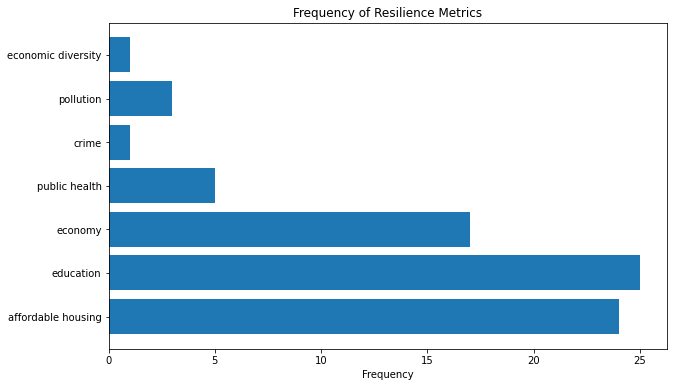

In [125]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the frequency of each resilience metric
frequency_resilience = Counter(resilience_metrics_Seattle)

# Create a bar plot of the frequencies
plt.figure(figsize=(10, 6))
plt.barh(list(frequency_resilience.keys()), list(frequency_resilience.values()))
plt.xlabel('Frequency')
plt.title('Frequency of Resilience Metrics')
plt.show()

In [128]:
# Create a sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model='distilbert-base-uncased-finetuned-sst-2-english')

# Tokenize the Surat text into words
Seattle_words = nltk.tokenize.word_tokenize(Seattle_text.lower())

# Define resilience metrics
resilience_metrics = ['public participation', 'integration', 'law enforcement', 'crime', 'environment ecosystem', 'economy', 
                      'water quality', 'affordable housing', 'connectivity mobility', 'waste management', 'social cohesion', 
                      'public health', 'pollution', 'education', 'health services', 'workforce development', 'youth opportunity programs']

# Convert resilience metrics to lower case
resilience_metrics = [metric.lower() for metric in resilience_metrics]

# Initialize an empty list to hold the results
results = []

# Analyze the sentiment of each word that is a resilience metric
for word in Seattle_words:
    if word in resilience_metrics:
        result = sentiment_analyzer(word)
        results.append([word, result[0]['label'], result[0]['score']])

# Convert the results list to a DataFrame
df = pd.DataFrame(results, columns=['Word', 'Sentiment', 'Score'])

df = df.drop_duplicates()

# Print the DataFrame
print(df)


         Word Sentiment     Score
0   education  POSITIVE  0.998959
1     economy  POSITIVE  0.998665
35      crime  NEGATIVE  0.993622
41  pollution  NEGATIVE  0.999501


In [129]:
from transformers import pipeline
import pandas as pd
import nltk
nltk.download('punkt')

# Create a sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model='distilbert-base-uncased-finetuned-sst-2-english')

# Tokenize the Surat text into sentences
seattle_sentences = nltk.tokenize.sent_tokenize(Seattle_text.lower())

# Define resilience metrics
resilience_metrics = ['public participation', 'integration', 'law enforcement', 'crime', 'environment ecosystem', 'economy', 'water quality', 'affordable housing', 'connectivity mobility', 'waste management', 'social cohesion', 'public health', 'pollution'
                      'education', 'health services', 'workforce development', 'youth opportunity programs']

# Convert resilience metrics to lower case
resilience_metrics = [metric.lower() for metric in resilience_metrics]

# Initialize an empty list to hold the results
results = []

# Analyze the sentiment of each sentence containing a resilience metric
for sentence in seattle_sentences:
    if any(metric in nltk.tokenize.word_tokenize(sentence) for metric in resilience_metrics):
        # Split long sentences into chunks of 512 tokens
        sentence_chunks = [sentence[i:i+512] for i in range(0, len(sentence), 512)]
        for chunk in sentence_chunks:
            result = sentiment_analyzer(chunk)
            results.append([chunk, result[0]['label'], result[0]['score']])

# Convert the results list to a DataFrame
df = pd.DataFrame(results, columns=['Sentence', 'Sentiment', 'Score'])

# Print the DataFrame
print(df)

df.to_csv('sentiment_analysis_results.csv', index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lifet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             Sentence Sentiment     Score
0   5\nwhile an abundant natural resource base, en...  NEGATIVE  0.944771
1   to this end, this resilience roadmap will focu...  POSITIVE  0.997108
2   they will elevate investment strategies and in...  POSITIVE  0.996984
3   it will \nhelp channel the prosperity of our t...  POSITIVE  0.999744
4   create and support career \npathways for new e...  POSITIVE  0.993164
5                         ople to connect to careers.  POSITIVE  0.999635
6   workers in the platform economy \nexperience p...  NEGATIVE  0.999472
7   specifically, the city has \nworked with the u...  POSITIVE  0.998594
8                             lies, \nand themselves.  NEGATIVE  0.997011
9   these same gig \neconomy jobs have also introd...  NEGATIVE  0.775377
10  the office of labor standards, office \nof eco...  POSITIVE  0.886825
11  recommendations may include \nclarifying labor...  POSITIVE  0.998694
12  \nthat aims to dramatically \nimpr

In [132]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the resilience metrics
resilience_metrics = ['public participation', 'integration', 'law enforcement', 'crime', 'environment ecosystem', 'economy', 'water quality', 'affordable housing', 'connectivity mobility', 'waste management', 'social cohesion', 'public health', 'pollution',
                      'education', 'health services', 'workforce development', 'youth opportunity programs']

# Create a DataFrame from the resilience metrics
df = pd.DataFrame({'Resilience Metrics': resilience_metrics})

# Remove duplicates
df = df.drop_duplicates()
print(df)

# Convert the text and the resilience metrics to lower case
Seattle_text_lower = Seattle_text.lower()
resilience_metrics_lower = [metric.lower() for metric in resilience_metrics]

# Initialize the TfidfVectorizer with the lower case resilience metrics and ngram_range set to (1, 2)
vectorizer = TfidfVectorizer(vocabulary=resilience_metrics_lower, ngram_range=(1, 2))

# Fit and transform the vectorizer on the lower case Surat text
X = vectorizer.fit_transform([Seattle_text_lower])

# Get the feature names and the TF-IDF scores
feature_names = vectorizer.get_feature_names_out()
scores = X.toarray()[0]

# Combining feature names and scores
features_scores = list(zip(feature_names, scores))

# Sort tuple list by score in descending order
features_scores_sorted = sorted(features_scores, key=lambda x: x[1], reverse=True)

# Create a DataFrame from the sorted feature scores
df = pd.DataFrame(features_scores_sorted, columns=['Term', 'TF-IDF Score'])
df


            Resilience Metrics
0         public participation
1                  integration
2              law enforcement
3                        crime
4        environment ecosystem
5                      economy
6                water quality
7           affordable housing
8        connectivity mobility
9             waste management
10             social cohesion
11               public health
12                   pollution
13                   education
14             health services
15       workforce development
16  youth opportunity programs


,Term,TF-IDF Score
0,education,0.629541
1,affordable housing,0.604360
2,economy,0.453270
3,public health,0.125908
4,health services,0.100727
5,pollution,0.075545
6,crime,0.025182
7,workforce development,0.025182
8,public participation,0.000000
9,integration,0.000000


In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Let's assume you have two documents: doc1 and doc2
doc1 = Seattle_text
doc2 = text

# Create the Document Term Matrix
vectorizer = TfidfVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform([doc1, doc2])

# Compute Cosine Similarity
cosine_sim = cosine_similarity(doc_term_matrix[0:1], doc_term_matrix)

print(f"Cosine similarity between the two documents is: {cosine_sim[0][1]}")


Cosine similarity between the two documents is: 0.27602481188272304


Comparing Seattle and Surat: 
1. Common Terms: Both Seattle and Surat have the following terms in their resilience metrics: 'affordable housing', 'economy', 'public health', and 'pollution'. However, the importance of these terms varies between the two cities. For example, 'affordable housing' has a higher score in Seattle than in Surat, indicating that it is a more prominent topic in Seattle's resilience strategy.

2. Unique Terms: Some terms appear in one city's metrics but not in the other's. For instance, 'education', 'health services', 'workforce development', and 'youth opportunity programs' are present in Seattle's metrics but not in Surat's. On the other hand, 'water quality', 'social cohesion', 'waste management', 'law enforcement', 'integration', 'public participation', 'connectivity mobility', and 'environment ecosystem' are present in Surat's metrics but not in Seattle's.

3. Term Importance: The TF-IDF scores indicate the relative importance of each term in the city's resilience strategy. In Seattle, 'education' has the highest score, suggesting it's a major focus of their strategy. In Surat, 'pollution' has the highest score, suggesting it's a major focus there.

More analysis will be provided.